# Импортируем библиотеки

In [3]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

# Загружаем датасет

In [5]:
datafile = 'bodmas.npz'
data = np.load(datafile)
X = data['X']
y = data['y']
print(X.shape, y.shape)
df = pd.DataFrame(X)
df.head()

(134435, 2381) (134435,)


,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Для начала отбросим полностью нулевые столбцы

In [6]:
zero = []
for n in df.columns:
    if df[n].std() == 0:
      zero.append(n)
df.drop(zero, axis = 1, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Далее попробуем убрать столбцы с наименьшим разбросом значений

In [8]:
minraz = []
for n in df.columns:
    if df[n].std() <= 0.1:
      minraz.append(n)
df.drop(minraz, axis = 1, inplace = True)
df.head()

,0,144,256,265,512,513,514,611,612,613,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.006669,0.000000,0.000000e+00,156.0,6.000000,936.0,6.439958,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004166,0.000000,0.000000e+00,9695.0,5.666426,54936.0,6.580194,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.003931,0.000000,0.000000e+00,2967.0,5.909673,17534.0,6.565606,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003704,0.000000,0.000000e+00,14107.0,5.785355,81614.0,6.581691,0.0,8.0,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003783,0.004743,7.734128e-07,17064.0,5.622832,95948.0,6.584044,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Соотношение классов

(array([77142.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 57293.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

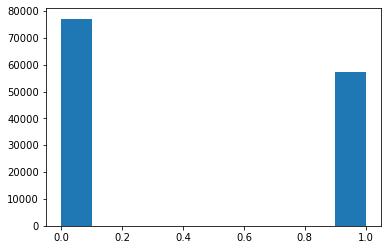

In [9]:
plt.hist(y)

In [10]:
df['Malware'] = y
df

,0,144,256,265,512,513,514,611,612,613,...,2372,2373,2374,2375,2376,2377,2378,2379,2380,Malware
0,0.056742,0.006669,0.000000,0.000000e+00,156.0,6.000000,936.0,6.439958,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.007062,0.004166,0.000000,0.000000e+00,9695.0,5.666426,54936.0,6.580194,0.0,0.0,...,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0,0
2,0.020975,0.003931,0.000000,0.000000e+00,2967.0,5.909673,17534.0,6.565606,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.006482,0.003704,0.000000,0.000000e+00,14107.0,5.785355,81614.0,6.581691,0.0,8.0,...,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0,0
4,0.022135,0.003783,0.004743,7.734128e-07,17064.0,5.622832,95948.0,6.584044,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.004019,0.001604,0.000000e+00,3824.0,12.047071,46068.0,4.627752,0.0,0.0,...,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
134431,0.065421,0.004019,0.001604,0.000000e+00,3824.0,12.047071,46068.0,4.627752,0.0,0.0,...,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
134432,0.142307,0.001909,0.010949,0.000000e+00,4153.0,10.387913,43141.0,6.298408,0.0,0.0,...,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1
134433,0.142308,0.001909,0.010949,0.000000e+00,4153.0,10.387913,43141.0,6.298408,0.0,0.0,...,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1


# Сравним по 10 первым признакам

D:\Anakonda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anakonda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anakonda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anakonda\lib\site-packages\seab

D:\Anakonda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anakonda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anakonda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anakonda\lib\site-packages\seab

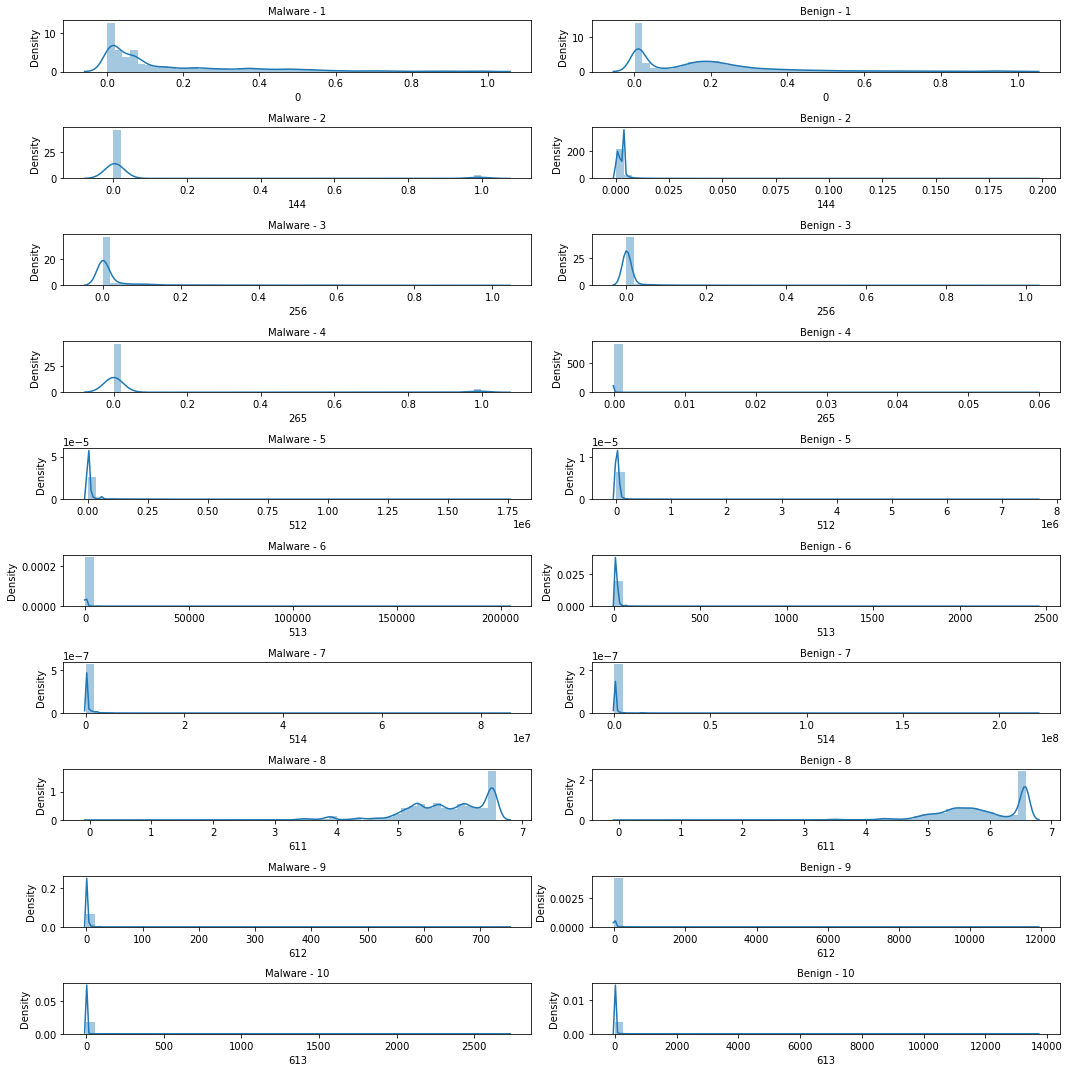

In [11]:
features = df.columns[:10]

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features, start=1):
    ax1 = plt.subplot(10, 2, i*2-1)
    sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware - {i}', fontsize=10)
    ax2 = plt.subplot(10, 2, i*2)
    sns.distplot(df[df['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign - {i}', fontsize=10)

plt.tight_layout()
plt.show()

# Создание тестовой и обучающей выборки

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Malware'], axis=1), df['Malware'], test_size=0.2, random_state=0)

# Обучение модели

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=0, oob_score = True, max_depth = 16)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

# Проверка модели

In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Beningn', 'Malware']))

              precision    recall  f1-score   support

     Beningn       0.99      0.99      0.99     15375
     Malware       0.99      0.99      0.99     11512

    accuracy                           0.99     26887
   macro avg       0.99      0.99      0.99     26887
weighted avg       0.99      0.99      0.99     26887



# Тепловая карта

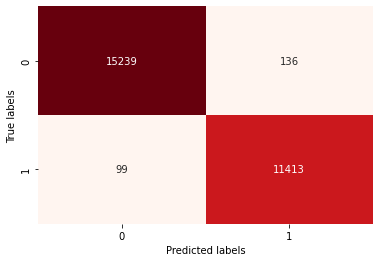

In [15]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=plt.cm.Reds, cbar=False)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

plt.show()

# Визуализация признаков

Text(0.5, 1.0, 'Features importance')

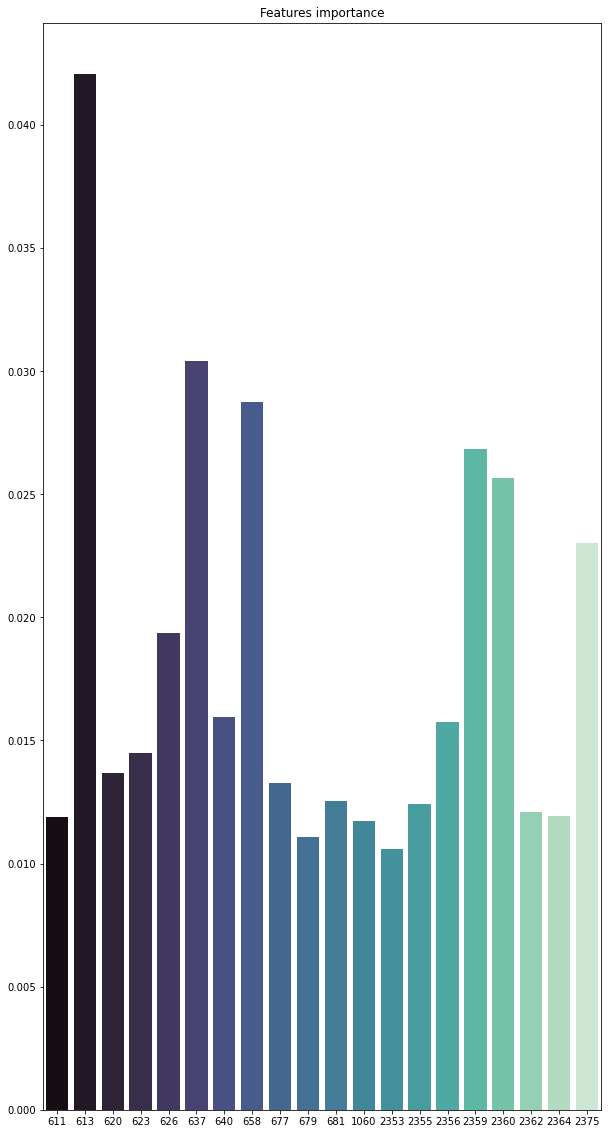

In [17]:
importance = model.feature_importances_ 
importance_dict = {df.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])[-20:]}
plt.figure(figsize=(10, 20))
sns.barplot(x=list(sorted_dict.keys())[::-1], y=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')